In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_excel('BBDD_Hospitalización.xlsx')

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [102]:
df['AGENTE AISLADO'].fillna("NO", inplace=True)

In [103]:
df['HOSPITALIZACION'].fillna("NO", inplace=True)

In [104]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna("NO", inplace=True)

In [110]:
df.dropna(inplace=True)

In [108]:

#df = df.drop(df[df['EDAD'] > 100].index)
df.loc[df['EDAD'] > 100, 'EDAD'] -= 100.0


In [111]:
df.isna().sum()

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

In [114]:
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 'SI')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', '0')

In [115]:
df['EDAD'] = df['EDAD'].astype(int)
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].astype(int)
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].astype(int)
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].astype(int)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(int)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       562 non-null    int32  
 1   DIABETES                                                                   562 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 562 non-null    object 
 3   PSA                                                                        562 non-null    float64
 4   BIOPSIAS PREVIAS                                                           562 non-null    object 
 5   VOLUMEN PROSTATICO                                                         562 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

In [122]:
print(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts())
'EDAD'
'DIABETES'
'HOSPITALIZACIÓN ULTIMO MES'
'PSA'
'BIOPSIAS PREVIAS'
'VOLUMEN PROSTATICO'
'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'
'NUMERO DE MUESTRAS TOMADAS'
'CUP'
'ENF. CRONICA PULMONAR OBSTRUCTIVA'
'BIOPSIA'
'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
'FIEBRE'
'ITU'
'TIPO DE CULTIVO'
'AGENTE AISLADO'
'PATRON DE RESISTENCIA'
'HOSPITALIZACION'
'DIAS HOSPITALIZACION MQ'
'DIAS HOSPITALIZACIÓN UPC'

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
0    537
2      8
3      8
1      5
5      2
9      2
Name: count, dtype: int64


'DIAS HOSPITALIZACIÓN UPC'

In [52]:
columnas = df.columns.to_list()
columnas

['EDAD',
 'DIABETES',
 'HOSPITALIZACIÓN ULTIMO MES',
 'PSA',
 'BIOPSIAS PREVIAS',
 'VOLUMEN PROSTATICO',
 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
 'NUMERO DE MUESTRAS TOMADAS',
 'CUP',
 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
 'BIOPSIA',
 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
 'FIEBRE',
 'ITU',
 'TIPO DE CULTIVO',
 'AGENTE AISLADO',
 'PATRON DE RESISTENCIA',
 'HOSPITALIZACION',
 'DIAS HOSPITALIZACION MQ',
 'DIAS HOSPITALIZACIÓN UPC']

In [123]:
for x in columnas:
    print(df.loc[df[x].isna()])

Empty DataFrame
Columns: [EDAD, DIABETES, HOSPITALIZACIÓN ULTIMO MES, PSA, BIOPSIAS PREVIAS, VOLUMEN PROSTATICO, ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, NUMERO DE MUESTRAS TOMADAS, CUP, ENF. CRONICA PULMONAR OBSTRUCTIVA, BIOPSIA, NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA, FIEBRE, ITU, TIPO DE CULTIVO, AGENTE AISLADO, PATRON DE RESISTENCIA, HOSPITALIZACION, DIAS HOSPITALIZACION MQ, DIAS HOSPITALIZACIÓN UPC]
Index: []
Empty DataFrame
Columns: [EDAD, DIABETES, HOSPITALIZACIÓN ULTIMO MES, PSA, BIOPSIAS PREVIAS, VOLUMEN PROSTATICO, ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, NUMERO DE MUESTRAS TOMADAS, CUP, ENF. CRONICA PULMONAR OBSTRUCTIVA, BIOPSIA, NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA, FIEBRE, ITU, TIPO DE CULTIVO, AGENTE AISLADO, PATRON DE RESISTENCIA, HOSPITALIZACION, DIAS HOSPITALIZACION MQ, DIAS HOSPITALIZACIÓN UPC]
Index: []
Empty DataFrame
Columns: [EDAD, DIABETES, HOSPITALIZACIÓN ULTIMO MES, PSA, BIOPSIAS PREVIAS, V

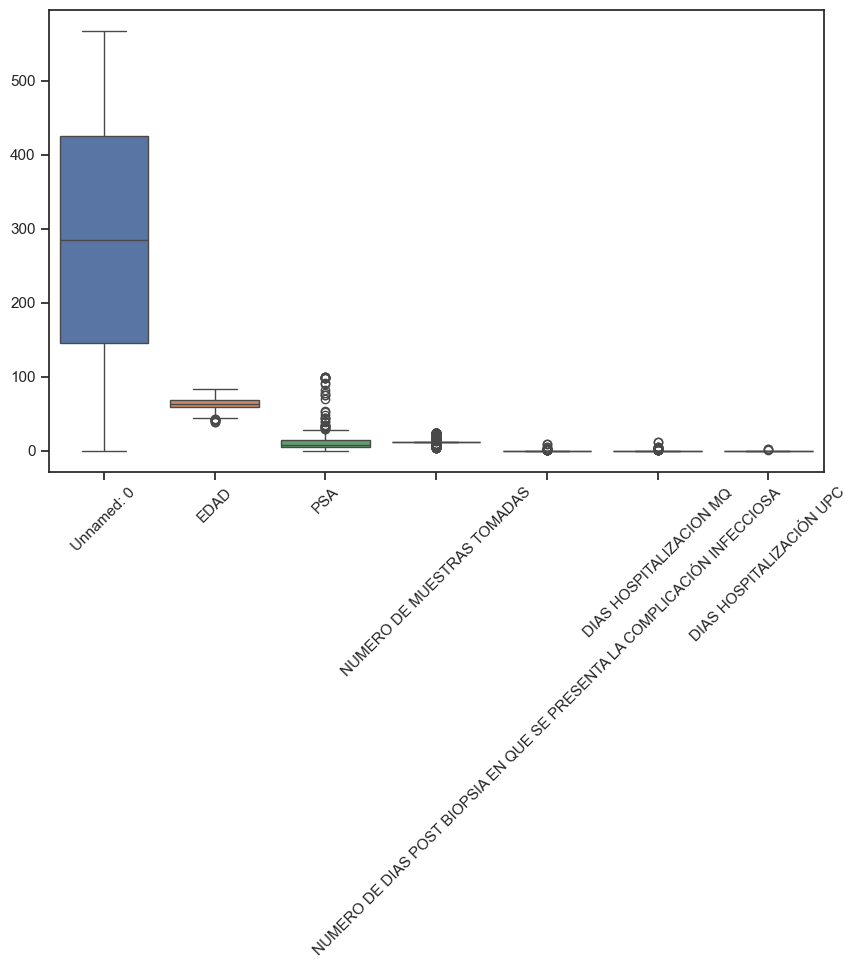

In [145]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df)

plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='PSA', ylabel='Count'>

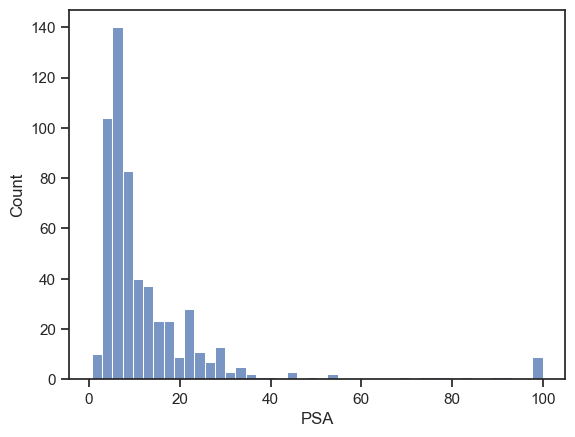

In [144]:
sns.histplot(df['PSA'])

In [149]:
df

,Unnamed: 0,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,...,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,...,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,...,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,...,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,...,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,...,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,562,78,NO,NO,9.3,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,...,NEG,0,NO,NO,NO,NO,NO,NO,0,0
558,563,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,...,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0
559,564,64,NO,NO,4.8,NO,SI,OTROS,12,NO,...,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
560,566,67,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,...,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0


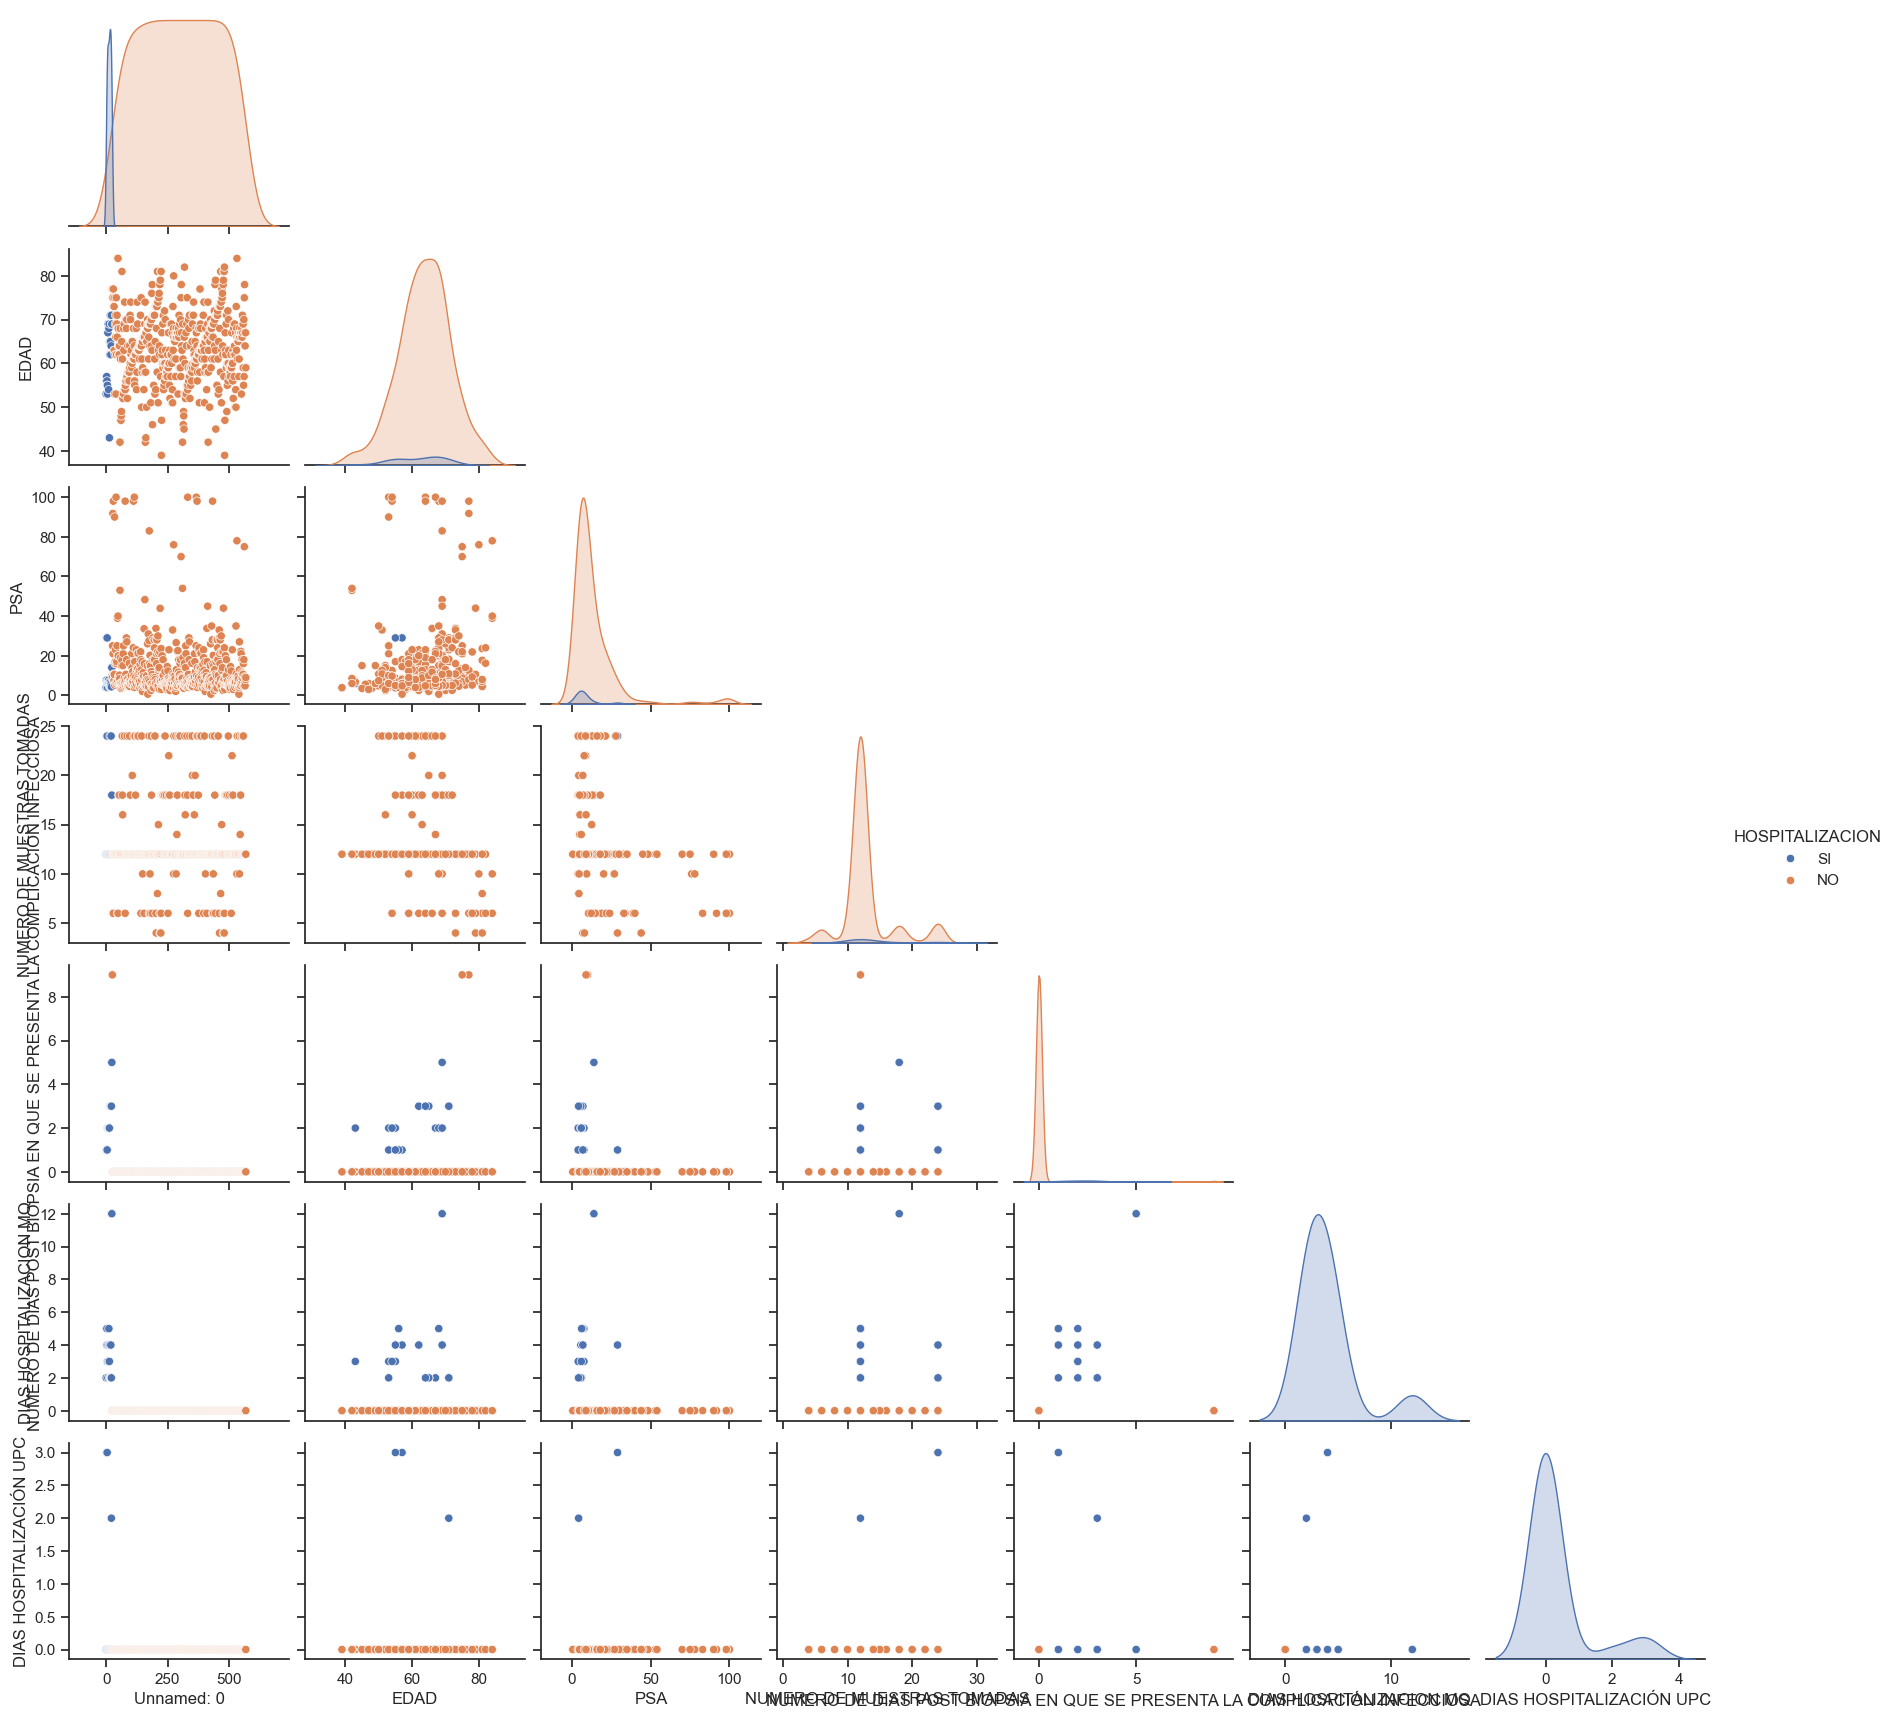

In [154]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue='HOSPITALIZACION', corner=True)
plt.show()